In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error

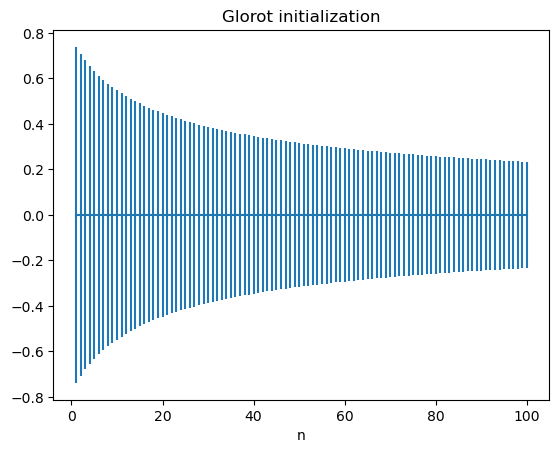

In [17]:
#Glorot initialization: range of values for the weights as a function of n
values=[i for i in range(1,101)]
m=10 #number of output units
results_glorot=[np.sqrt(6/(i+m)) for i in values]
plt.errorbar(values,[0.0 for _ in values], yerr=results_glorot)
plt.title("Glorot initialization")
plt.xlabel("n") # number of input units
plt.show()

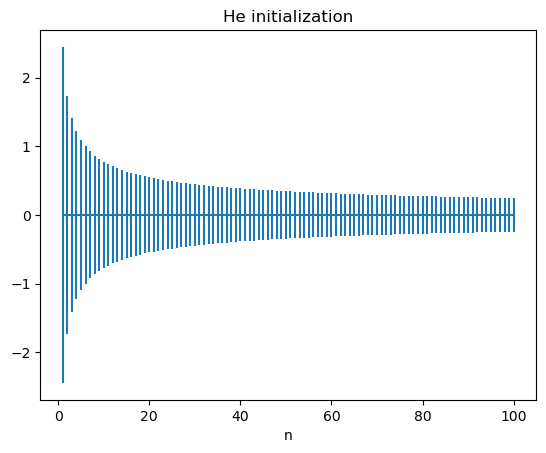

In [18]:
#He initialization
results_he=[np.sqrt(6.0/i) for i in values]
plt.errorbar(values,[0.0 for _ in values], yerr=results_he)
plt.title("He initialization")
plt.xlabel("n")
plt.show()

In [24]:
folder='/home/unipi/v.vichi3/Desktop/'
X_train, X_val, X_test, y_train, y_val, y_test=np.load(folder+'X_train.npy'), np.load(folder+'X_val.npy'), np.load(folder+'X_test.npy'), np.load(folder+'y_train.npy'), np.load(folder+'y_val.npy'), np.load(folder+'y_test.npy')

In [25]:
#Choose the most appropriate standard deviation for the Random Normal initializer
rand_norm=[keras.initializers.RandomNormal(mean=0.0,stddev=1),keras.initializers.RandomNormal(mean=0.0,stddev=0.1),keras.initializers.RandomNormal(mean=0.0,stddev=0.01),keras.initializers.RandomNormal(mean=0.0,stddev=0.001)]
models=np.zeros_like(rand_norm)
for i in range(len(models)):
  models[i]=keras.models.Sequential()
  models[i].add(keras.layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1], kernel_initializer=rand_norm[i]))
  models[i].add(keras.layers.Dense(units=32, activation='sigmoid', kernel_initializer=rand_norm[i]))
  models[i].add(keras.layers.Dense(units=64, activation='sigmoid', kernel_initializer=rand_norm[i]))
  models[i].add(keras.layers.Dense(units=1, activation='relu', kernel_initializer=rand_norm[i]))
  models[i].compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mean_absolute_error'])

In [4]:
histories=np.zeros_like(models)
for i in range(len(models)):
    histories[i]=models[i].fit(X_train,y_train,
                               validation_data=(X_val,y_val),
                               batch_size=32,
                               epochs=50)

2024-05-06 20:06:06.530048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-06 20:06:06.559170: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3892860000 Hz


Epoch 1/50
18750/18750 [==============================] - 10s 534us/step - loss: 0.2688 - mean_absolute_error: 0.2058 - val_loss: 0.0168 - val_mean_absolute_error: 0.1058
Epoch 2/50
18750/18750 [==============================] - 6s 347us/step - loss: 0.0170 - mean_absolute_error: 0.1065 - val_loss: 0.0148 - val_mean_absolute_error: 0.0984
Epoch 3/50
18750/18750 [==============================] - 6s 346us/step - loss: 0.0150 - mean_absolute_error: 0.0994 - val_loss: 0.0149 - val_mean_absolute_error: 0.0999
Epoch 4/50
18750/18750 [==============================] - 6s 343us/step - loss: 0.0146 - mean_absolute_error: 0.0979 - val_loss: 0.0152 - val_mean_absolute_error: 0.1009
Epoch 5/50
18750/18750 [==============================] - 6s 344us/step - loss: 0.0145 - mean_absolute_error: 0.0971 - val_loss: 0.0144 - val_mean_absolute_error: 0.0962
Epoch 6/50
18750/18750 [==============================] - 6s 346us/step - loss: 0.0137 - mean_absolute_error: 0.0930 - val_loss: 0.0116 - val_mean_ab

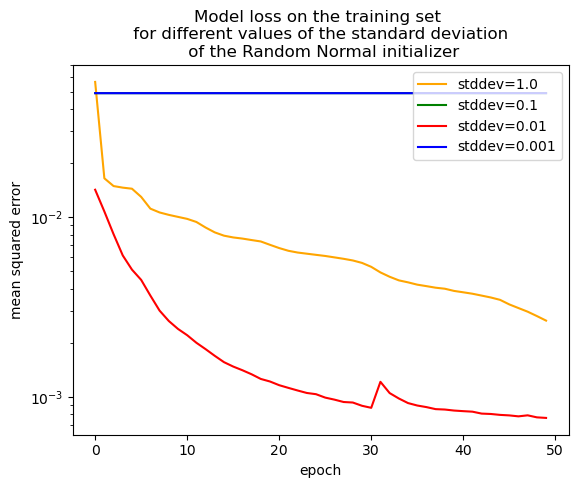

In [5]:
colors=['orange','green','red','blue']
legend=['stddev=1.0','stddev=0.1','stddev=0.01','stddev=0.001']
for i in range(len(models)):
    plt.plot(histories[i].history['loss'],color=colors[i])
    plt.yscale('log')
plt.title('Model loss on the training set \n for different values of the standard deviation \n of the Random Normal initializer')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()

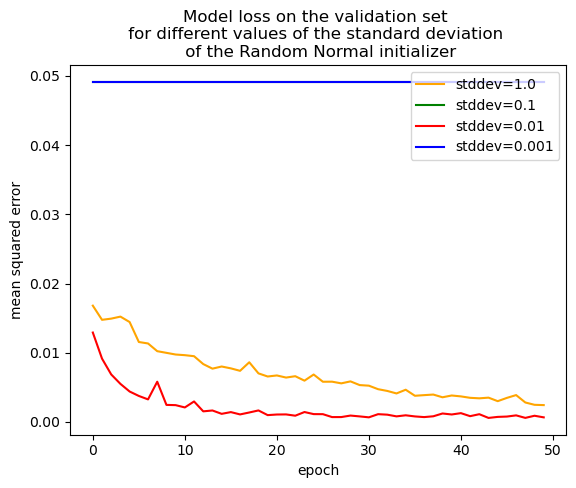

In [6]:
colors=['orange','green','red','blue']
legend=['stddev=1.0','stddev=0.1','stddev=0.01','stddev=0.001']
for i in range(len(models)):
  plt.plot(histories[i].history['val_loss'],color=colors[i])
plt.title('Model loss on the validation set \n for different values of the standard deviation  \n of the Random Normal initializer')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()

In [26]:
#Choose the most appropriate range for the Random Uniform initializer
rand_unif=[keras.initializers.RandomUniform(minval=-1,maxval=1),keras.initializers.RandomUniform(minval=-0.1,maxval=0.1),keras.initializers.RandomUniform(minval=-0.01,maxval=0.01),keras.initializers.RandomUniform(minval=-0.001,maxval=0.001)]
models=np.zeros_like(rand_unif)
for i in range(len(models)):
  models[i]=keras.models.Sequential()
  models[i].add(keras.layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1], kernel_initializer=rand_unif[i]))
  models[i].add(keras.layers.Dense(units=32, activation='sigmoid', kernel_initializer=rand_unif[i]))
  models[i].add(keras.layers.Dense(units=64, activation='sigmoid', kernel_initializer=rand_unif[i]))
  models[i].add(keras.layers.Dense(units=1, activation='relu', kernel_initializer=rand_unif[i]))
  models[i].compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mean_absolute_error'])

In [8]:
histories=np.zeros_like(models)
for i in range(len(models)):
    histories[i]=models[i].fit(X_train,y_train,
                               validation_data=(X_val,y_val),
                               batch_size=32,
                               epochs=50)

Epoch 1/50
18750/18750 [==============================] - 7s 356us/step - loss: 0.0434 - mean_absolute_error: 0.1312 - val_loss: 0.0149 - val_mean_absolute_error: 0.0997
Epoch 2/50
18750/18750 [==============================] - 7s 351us/step - loss: 0.0145 - mean_absolute_error: 0.0974 - val_loss: 0.0139 - val_mean_absolute_error: 0.0945
Epoch 3/50
18750/18750 [==============================] - 7s 349us/step - loss: 0.0133 - mean_absolute_error: 0.0914 - val_loss: 0.0115 - val_mean_absolute_error: 0.0835
Epoch 4/50
18750/18750 [==============================] - 7s 349us/step - loss: 0.0112 - mean_absolute_error: 0.0823 - val_loss: 0.0106 - val_mean_absolute_error: 0.0795
Epoch 5/50
18750/18750 [==============================] - 6s 346us/step - loss: 0.0104 - mean_absolute_error: 0.0787 - val_loss: 0.0113 - val_mean_absolute_error: 0.0832
Epoch 6/50
18750/18750 [==============================] - 7s 351us/step - loss: 0.0093 - mean_absolute_error: 0.0734 - val_loss: 0.0087 - val_mean_abs

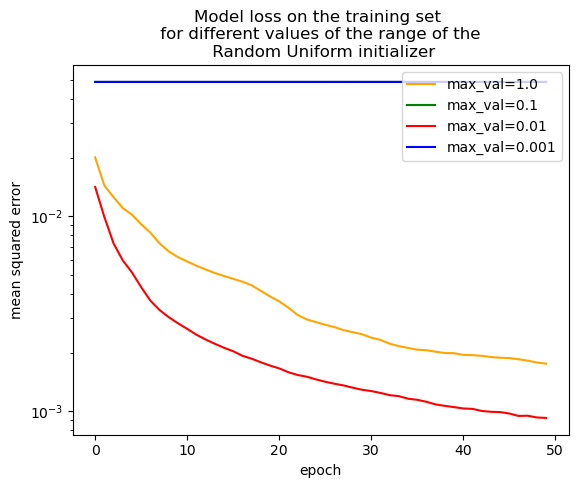

In [9]:
colors=['orange','green','red','blue']
legend=['max_val=1.0','max_val=0.1','max_val=0.01','max_val=0.001']
for i in range(len(models)):
    plt.plot(histories[i].history['loss'],color=colors[i])
    plt.yscale('log')
plt.title('Model loss on the training set \n for different values of the range of the \n Random Uniform initializer')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()

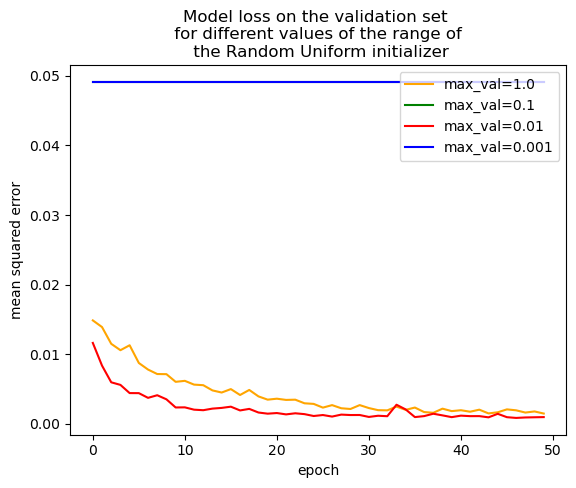

In [10]:
colors=['orange','green','red','blue']
legend=['max_val=1.0','max_val=0.1','max_val=0.01','max_val=0.001']
for i in range(len(models)):
  plt.plot(histories[i].history['val_loss'],color=colors[i])
plt.title('Model loss on the validation set \n for different values of the range of \n the Random Uniform initializer')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()

In [31]:
#Now choose the most appropriate initializer among: Random Normal (with standard deviation as selected above), 
#Random Uniform (with range selected above), Glorot Normal, Glorot Uniform, He Normal, He Uniform, 
#mixed (Glorot Uniform for sigmoid activation, He Uniform for ReLU activation)
my_initializers=[keras.initializers.RandomNormal(mean=0, stddev=0.1), keras.initializers.RandomUniform(minval=-1, maxval=1), keras.initializers.GlorotNormal, keras.initializers.GlorotUniform, keras.initializers.HeNormal, keras.initializers.HeUniform]
models=np.zeros_like(my_initializers)
for i in range(len(models)):
  models[i]=keras.models.Sequential()
  models[i].add(keras.layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1], kernel_initializer=my_initializers[i]))
  models[i].add(keras.layers.Dense(units=32, activation='sigmoid', kernel_initializer=my_initializers[i]))
  models[i].add(keras.layers.Dense(units=64, activation='sigmoid', kernel_initializer=my_initializers[i]))
  models[i].add(keras.layers.Dense(units=1, activation='relu', kernel_initializer=my_initializers[i]))
  models[i].compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mean_absolute_error'])

In [32]:
histories=np.zeros_like(models)
for i in range(len(models)):
    histories[i]=models[i].fit(X_train,y_train,
                               validation_data=(X_val,y_val),
                               batch_size=32,
                               epochs=100)

Epoch 1/100
18750/18750 [==============================] - 7s 363us/step - loss: 0.0150 - mean_absolute_error: 0.0996 - val_loss: 0.0106 - val_mean_absolute_error: 0.0802
Epoch 2/100
18750/18750 [==============================] - 7s 371us/step - loss: 0.0101 - mean_absolute_error: 0.0772 - val_loss: 0.0076 - val_mean_absolute_error: 0.0649
Epoch 3/100
18750/18750 [==============================] - 7s 365us/step - loss: 0.0077 - mean_absolute_error: 0.0655 - val_loss: 0.0063 - val_mean_absolute_error: 0.0588
Epoch 4/100
18750/18750 [==============================] - 7s 363us/step - loss: 0.0062 - mean_absolute_error: 0.0573 - val_loss: 0.0047 - val_mean_absolute_error: 0.0485
Epoch 5/100
18750/18750 [==============================] - 7s 367us/step - loss: 0.0049 - mean_absolute_error: 0.0506 - val_loss: 0.0038 - val_mean_absolute_error: 0.0442
Epoch 6/100
18750/18750 [==============================] - 7s 363us/step - loss: 0.0040 - mean_absolute_error: 0.0454 - val_loss: 0.0036 - val_me

In [35]:
model_mixed=keras.models.Sequential()
model_mixed.add(keras.layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1], kernel_initializer=keras.initializers.HeUniform))
model_mixed.add(keras.layers.Dense(units=32, activation='sigmoid', kernel_initializer=keras.initializers.GlorotUniform))
model_mixed.add(keras.layers.Dense(units=64, activation='sigmoid', kernel_initializer=keras.initializers.GlorotUniform))
model_mixed.add(keras.layers.Dense(units=1, activation='relu', kernel_initializer=keras.initializers.HeUniform))
model_mixed.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mean_absolute_error'])

In [36]:
hist_mixed=model_mixed.fit(X_train,y_train,
                           validation_data=(X_val,y_val),
                           batch_size=32,
                           epochs=100)

Epoch 1/100
18750/18750 [==============================] - 7s 359us/step - loss: 0.0163 - mean_absolute_error: 0.1050 - val_loss: 0.0160 - val_mean_absolute_error: 0.1058
Epoch 2/100
18750/18750 [==============================] - 7s 356us/step - loss: 0.0158 - mean_absolute_error: 0.1035 - val_loss: 0.0158 - val_mean_absolute_error: 0.1044
Epoch 3/100
18750/18750 [==============================] - 7s 362us/step - loss: 0.0155 - mean_absolute_error: 0.1024 - val_loss: 0.0151 - val_mean_absolute_error: 0.1016
Epoch 4/100
18750/18750 [==============================] - 7s 359us/step - loss: 0.0146 - mean_absolute_error: 0.0981 - val_loss: 0.0143 - val_mean_absolute_error: 0.0964
Epoch 5/100
18750/18750 [==============================] - 7s 357us/step - loss: 0.0125 - mean_absolute_error: 0.0870 - val_loss: 0.0112 - val_mean_absolute_error: 0.0804
Epoch 6/100
18750/18750 [==============================] - 7s 361us/step - loss: 0.0113 - mean_absolute_error: 0.0811 - val_loss: 0.0108 - val_me

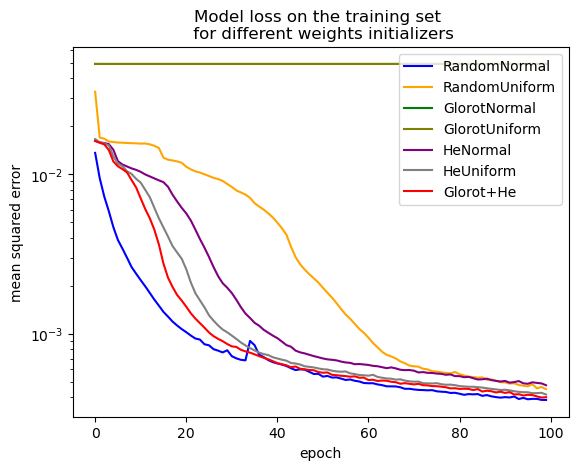

In [37]:
colors=['blue','orange','green','olive','purple','gray','red']
legend=['RandomNormal','RandomUniform','GlorotNormal','GlorotUniform','HeNormal','HeUniform','Glorot+He']
for i in range(len(my_initializers)):
    plt.plot(histories[i].history['loss'],color=colors[i])
    plt.yscale('log')
plt.plot(hist_mixed.history['loss'],color=colors[-1])
plt.title('Model loss on the training set \n for different weights initializers')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()

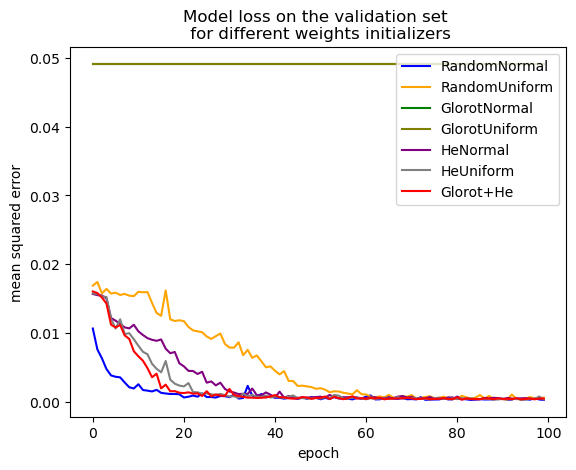

In [38]:
colors=['blue','orange','green','olive','purple','gray','red']
legend=['RandomNormal','RandomUniform','GlorotNormal','GlorotUniform','HeNormal','HeUniform','Glorot+He']
for i in range(len(my_initializers)):
    plt.plot(histories[i].history['val_loss'],color=colors[i])
plt.plot(hist_mixed.history['val_loss'], color=colors[-1])
plt.title('Model loss on the validation set \n for different weights initializers')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(legend,loc='upper right')
plt.show()